In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ua-calls:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5838456%2F9576909%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241008%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241008T175107Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D27f03ac4e89ee18eb2afd731ec5ed2f54e8e70c2441ca12217a4211964540d9cd87ca84b941b3a981e81b1b0f4d222a9e4e9c74f2505543c56349a1964cb7725fcef082cb8eb7ba07be2f1424497e2793a40f23469c48cc0ec651927ef4806b40df2edcd8ccfa48b88ab28dcbdff728c50d85720393b3b52c7ae88138b76a90581f3f452a8424b5912a73cc1d21c06733b57ff21ab965fd7b1e8ddd035799a5cd14fcdafb1ec9ac083a3a40b8a6df75c904ebdb3d40505036e7fd7264959910c957c78472ba28af7289f005d22b1f4e9173abd531c6bd66e69576014ce30ca5a447bb8a6fa61eda305e2dbd14f41feb0a698813965fef01c329fc1cee1993272'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 56600679 bytes downloaded
Downloaded and uncompressed: ua-calls
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ua-calls/reason18315ff.csv
/kaggle/input/ua-calls/callsf0d4f5a.csv
/kaggle/input/ua-calls/testbc7185d.csv
/kaggle/input/ua-calls/sentiment_statisticscc1e57a.csv
/kaggle/input/ua-calls/customers2afd6ea.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
#analysing calls.csv
df1 = pd.read_csv('/kaggle/input/ua-calls/callsf0d4f5a.csv')
print(df1.head(10))

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057    08-01-2024 00:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324    08-01-2024 00:05   
4  1211603231   5214456437    721730    08-01-2024 00:04   
5  5297766997   5590154991    817160    08-01-2024 00:11   
6   324593040   6774865122    519057    08-01-2024 00:08   
7  8902603117   7974326984    488324    08-01-2024 00:13   
8  7222687732   8023417234    957331    08-01-2024 00:14   
9  4113684017   1528835057    158319    08-01-2024 00:20   

  agent_assigned_datetime call_end_datetime  \
0        08-01-2024 00:03  08-01-2024 00:34   
1        08-01-2024 00:06  08-01-2024 00:18   
2        08-01-2024 00:07  08-01-2024 00:26   
3        08-01-2024 00:10  08-01-2024 00:17   
4        08-01-2024 00:14  08-01-2024 00:23   
5        08-01-2024 00:16  08-01-2024 00:40   
6        0

In [ ]:
df1['call_start_datetime'] = pd.to_datetime(df1['call_start_datetime'], format='mixed')
df1['agent_assigned_datetime'] = pd.to_datetime(df1['agent_assigned_datetime'], format='mixed')
df1['call_end_datetime'] = pd.to_datetime(df1['call_end_datetime'], format='mixed')

print(df1.head())

In [ ]:
# checking for missing values
missing_values = df1.isnull().sum()
print(missing_values)

# checking for duplicates
duplicates = df1.duplicated().sum()
print(duplicates)

# calculate AHT and AST
df1['AHT'] = (df1['call_end_datetime'] - df1['agent_assigned_datetime']).dt.total_seconds()
df1['AST'] = (df1['agent_assigned_datetime'] - df1['call_start_datetime']).dt.total_seconds()

aht = sum(df1['AHT'])/len(df1)
print(aht/60)

ast = sum(df1['AST'])/len(df1)
print(ast/60)

In [ ]:
print(len(df1))

# Finding peak hours and peak days

In [ ]:

# Extract hour and day of week
df1['hour'] = df1['call_start_datetime'].dt.hour
df1['day_of_week'] = df1['call_start_datetime'].dt.day_name()

# Find peak hours
peak_hours = df1.groupby('hour').size().reset_index(name='call_count').sort_values(by='call_count', ascending=False)
print("Peak Hours:")
print(peak_hours)

# Find peak days
peak_days = df1.groupby('day_of_week').size().reset_index(name='call_count').sort_values(by='call_count', ascending=False)
print("Peak Days:")
print(peak_days)

# Plot for Peak Hours
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='call_count', data=peak_hours, palette='viridis')
plt.title('Peak Hours for Calls')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Peak Days
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='call_count', data=peak_days, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Peak Days for Calls')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('/kaggle/input/ua-calls/customers2afd6ea.csv')
df3 = pd.read_csv('/kaggle/input/ua-calls/reason18315ff.csv')
df4 = pd.read_csv('/kaggle/input/ua-calls/sentiment_statisticscc1e57a.csv')

In [ ]:
df2.head()

In [ ]:
df3.head()

In [ ]:
df3['primary_call_reason'].unique()

In [ ]:
data = [np.nan, 'Seating', 'Voluntary Cancel', 'Voluntary Change', 'Post-Flight',
        'Communications', 'Baggage', 'Mileage Plus', 'IRROPS', 'IRROPS  ',
        'Digital   Support', 'Checkout', 'Check-In', 'Upgrade', 'Voluntary   Change',
        'Booking', 'Other Topics', 'ETC', 'Products & Services', 'Products and Services',
        'Digital Support', 'Post-Flight  ', 'Traveler   Updates', 'Voluntary  Change',
        'Traveler Updates', 'Voluntary  Cancel', 'Disability', 'Upgrade  ',
        'Digital  Support', 'Unaccompanied Minor', 'Mileage Plus  ', 'Traveler  Updates',
        'Check In', 'Schedule Change', 'Products and Services  ', 'Post Flight',
        'Mileage   Plus', 'Voluntary Change  ', 'Seating  ', 'Mileage  Plus',
        'Digital Support  ', 'Baggage  ', 'Other  Topics', 'Booking  ', ' Baggage',
        'Communications  ', 'Check-In  ', 'Traveler Updates  ', 'Unaccompanied Minor  ',
        'Checkout  ', 'ETC  ', 'Schedule Change  ', 'Other Topics  ', 'Voluntary Cancel  ',
        'Disability  ']

df3['primary_call_reason'] = df3['primary_call_reason'].str.strip()  # Remove leading/trailing spaces
df3['primary_call_reason'] = df3['primary_call_reason'].str.title()  # Convert to title case

df3['primary_call_reason'] = df3['primary_call_reason'].replace({
    'Voluntary Cancel': 'Voluntary Cancel',
    'Voluntary  Cancel': 'Voluntary Cancel',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Products & Services': 'Products and Services',
    'Products and Services  ': 'Products and Services',
    'Products and Services  ': 'Products and Services',
    'Digital Support': 'Digital Support',
    'Digital   Support': 'Digital Support',
    'Digital  Support': 'Digital Support',
    'Baggage': 'Baggage',
    'Baggage  ': 'Baggage',
    'Mileage Plus': 'Mileage Plus',
    'Mileage   Plus': 'Mileage Plus',
    'Mileage  Plus': 'Mileage Plus',
    'Check-In': 'Check-In',
    'Check-In  ': 'Check-In',
    'Check In': 'Check-In',
    'Check In  ': 'Check-In',
    'Schedule Change': 'Schedule Change',
    'Schedule Change  ': 'Schedule Change',
    'Unaccompanied Minor': 'Unaccompanied Minor',
    'Unaccompanied Minor  ': 'Unaccompanied Minor',
    'Other Topics': 'Other Topics',
    'Other Topics  ': 'Other Topics',
    'Other  Topics': 'Other Topics',
    'Traveler Updates': 'Traveler Updates',
    'Traveler  Updates  ': 'Traveler Updates',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Post-Flight': 'Post-Flight',
    'Post-Flight  ': 'Post-Flight',
    'Post Flight': 'Post-Flight',
    'Post Flight  ': 'Post-Flight',
})

# View the cleaned data
print(df3['primary_call_reason'].value_counts())

In [ ]:
df4.head()

In [ ]:
df1['call_duration'] = (df1['call_end_datetime'] - df1['call_start_datetime']).dt.total_seconds()

# Check for outliers in call durations
Q1_duration = df1['call_duration'].quantile(0.25)
Q3_duration = df1['call_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Find call duration outliers
duration_outliers = df1[(df1['call_duration'] < lower_bound_duration) | (df1['call_duration'] > upper_bound_duration)]
print(duration_outliers)
print(len(duration_outliers))

In [ ]:
merged_df = df1.merge(df3, on='call_id', how='inner').merge(df4, on='call_id', how='inner').merge(df2, on='customer_id', how='inner')
selected_columns = ['call_id', 'customer_id', 'elite_level_code', 'primary_call_reason', 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average', 'AHT', 'AST']
final_df = merged_df[selected_columns]
final_df.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['call_duration'])
plt.title('Boxplot for Call Duration')
plt.show()

In [ ]:
print(len(final_df))

In [ ]:
new_duplicates = final_df.duplicated().sum()
print(new_duplicates)

In [ ]:
print(final_df['elite_level_code'].unique())
print(final_df['primary_call_reason'].unique())
print(final_df['agent_tone'].unique())
print(final_df['customer_tone'].unique())

# Dropping nan values from the dataset

In [ ]:
print('Before dropping nan records\n')
print(final_df.isna().sum())

print('\nAfter dropping nan records\n')
final_df = final_df.dropna()
print(final_df.isna().sum())

# Key factors contributing in peak hours and peak days


In [ ]:
peak_hour_list = peak_hours['hour'].head(10)  # Top 10 peak hours
peak_day_list = peak_days['day_of_week'].head(3)  # Top 3 days

merged_df['is_peak_hour'] = merged_df['hour'].isin(peak_hour_list)
merged_df['is_peak_day'] = merged_df['day_of_week'].isin(peak_day_list)

peak_hour_call_types = merged_df.groupby(['is_peak_hour', 'primary_call_reason']).size().reset_index(name='call_count')
peak_day_call_types = merged_df.groupby(['is_peak_day', 'primary_call_reason']).size().reset_index(name='call_count')

print(peak_hour_call_types)
print(peak_day_call_types)

In [32]:
peak_hour_AST = merged_df.groupby('is_peak_hour')['AST'].mean().reset_index()
peak_hour_AHT = merged_df.groupby('is_peak_hour')['AHT'].mean().reset_index()

peak_day_AST = merged_df.groupby('is_peak_day')['AST'].mean().reset_index()
peak_day_AHT = merged_df.groupby('is_peak_day')['AHT'].mean().reset_index()

print(peak_hour_AST)
print(peak_hour_AHT)
print(peak_day_AST)
print(peak_day_AHT)

   is_peak_hour         AST
0         False  436.791911
1          True  437.039234
   is_peak_hour         AHT
0         False  702.428998
1          True  695.219030
   is_peak_day         AST
0        False  437.675415
1         True  436.658860
   is_peak_day         AHT
0        False  694.559088
1         True  698.342441


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


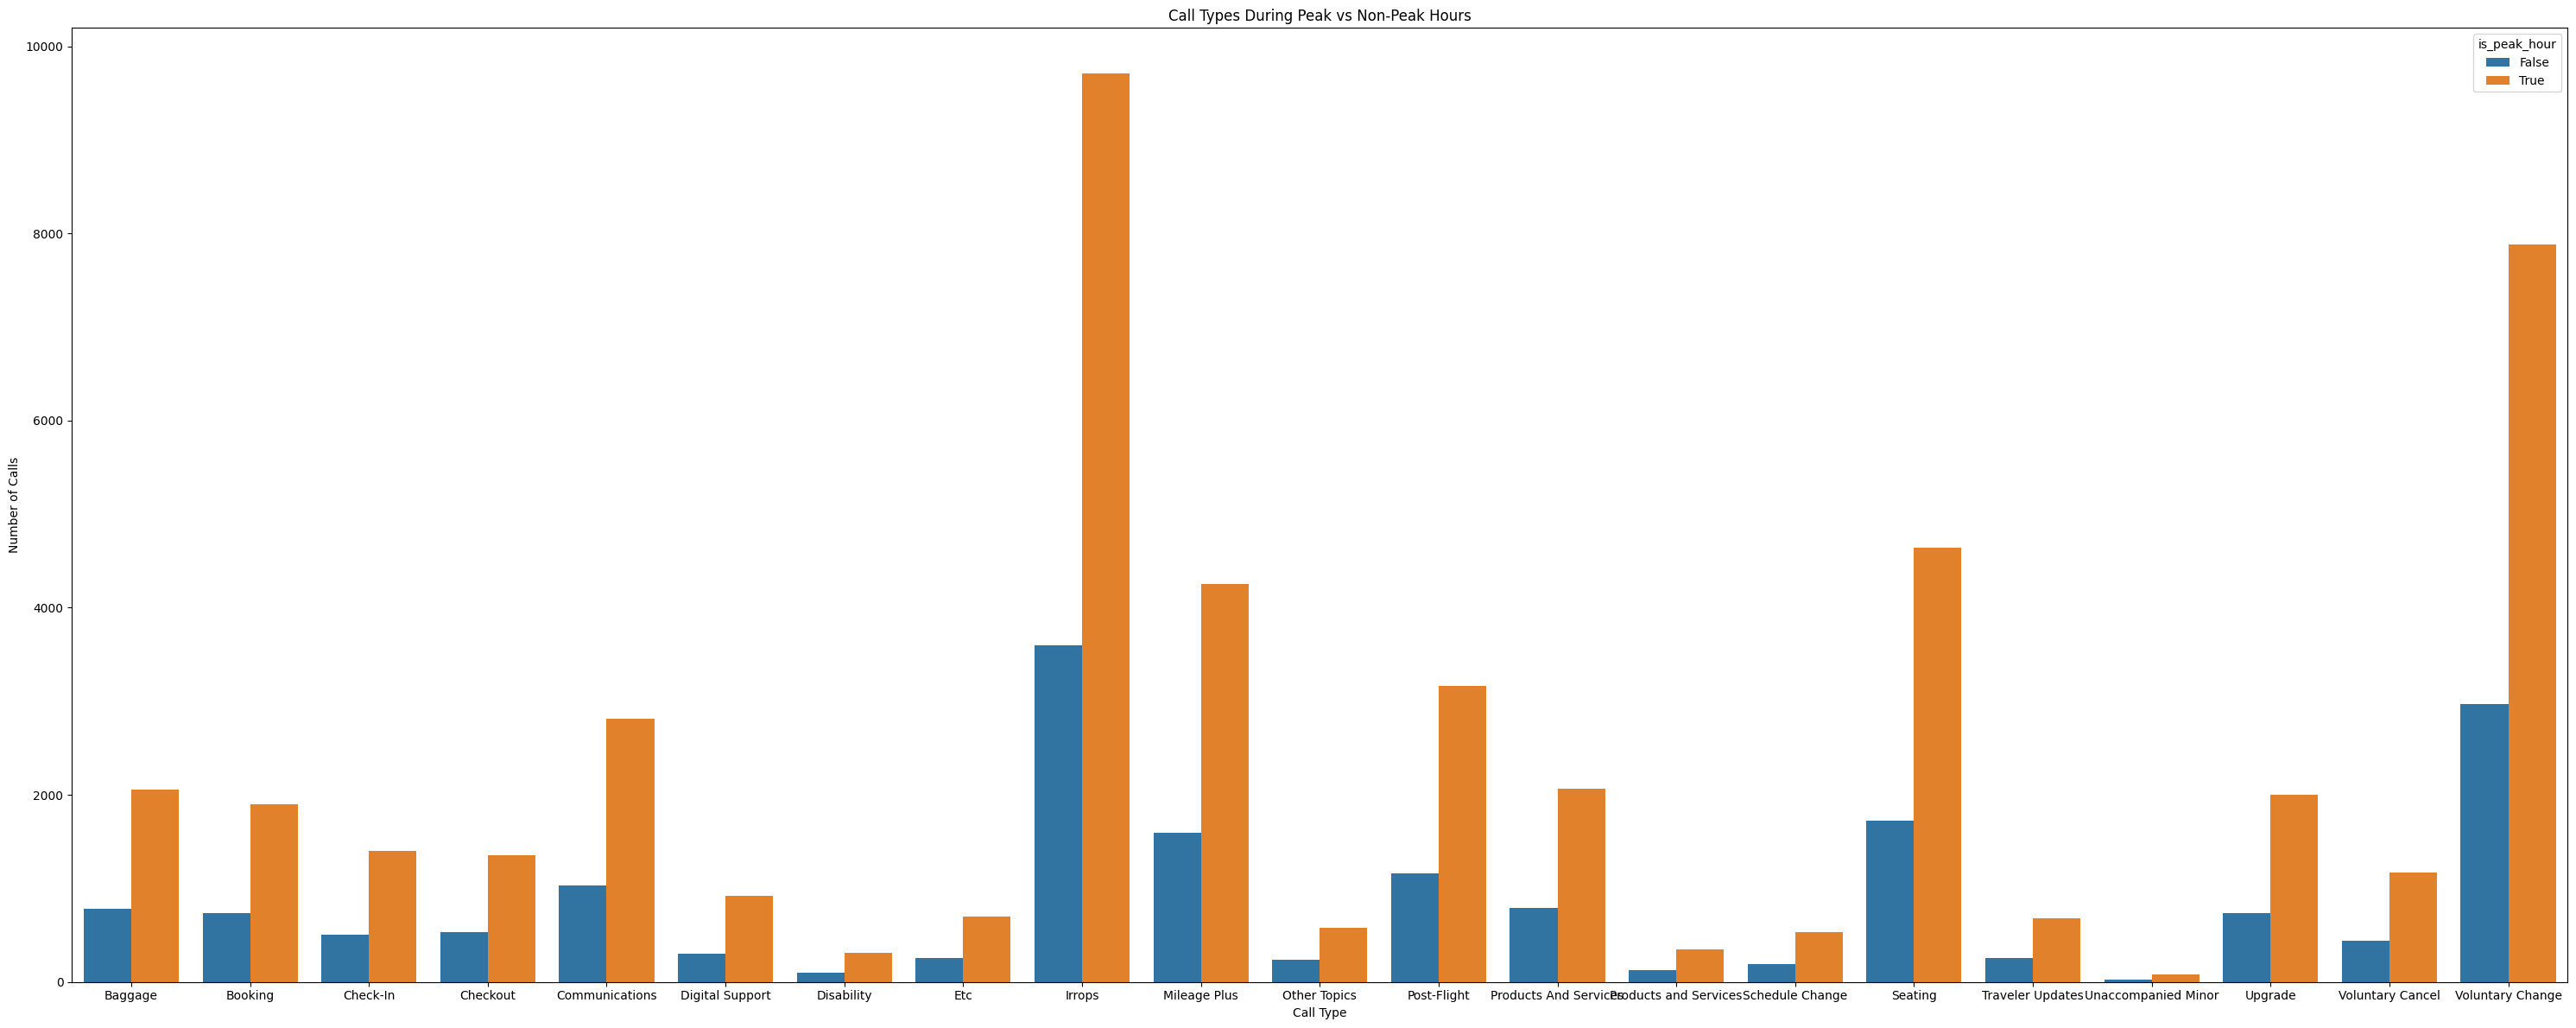

In [33]:
plt.figure(figsize=(30, 12))
sns.barplot(x='primary_call_reason', y='call_count', hue='is_peak_hour', data=peak_hour_call_types)
plt.title('Call Types During Peak vs Non-Peak Hours')
plt.xlabel('Call Type')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

In [34]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['primary_call_reason']= le.fit_transform(final_df['primary_call_reason'])
final_df['agent_tone']= le.fit_transform(final_df['agent_tone'])
final_df['customer_tone']= le.fit_transform(final_df['customer_tone'])

final_df.head()

,call_id,customer_id,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST
0,4667960400,2033123310,4.0,19,3,0,-0.04,0.39,1860.0,420.0
3,2266439882,1154544516,2.0,18,3,2,-0.20,0.20,420.0,300.0
4,1211603231,5214456437,0.0,15,3,4,-0.05,0.35,540.0,600.0
5,5297766997,5590154991,5.0,9,1,1,0.10,0.11,1440.0,300.0
7,8902603117,7974326984,2.0,9,1,0,0.11,0.35,480.0,480.0


# Finding correlation

1. spearman correlation

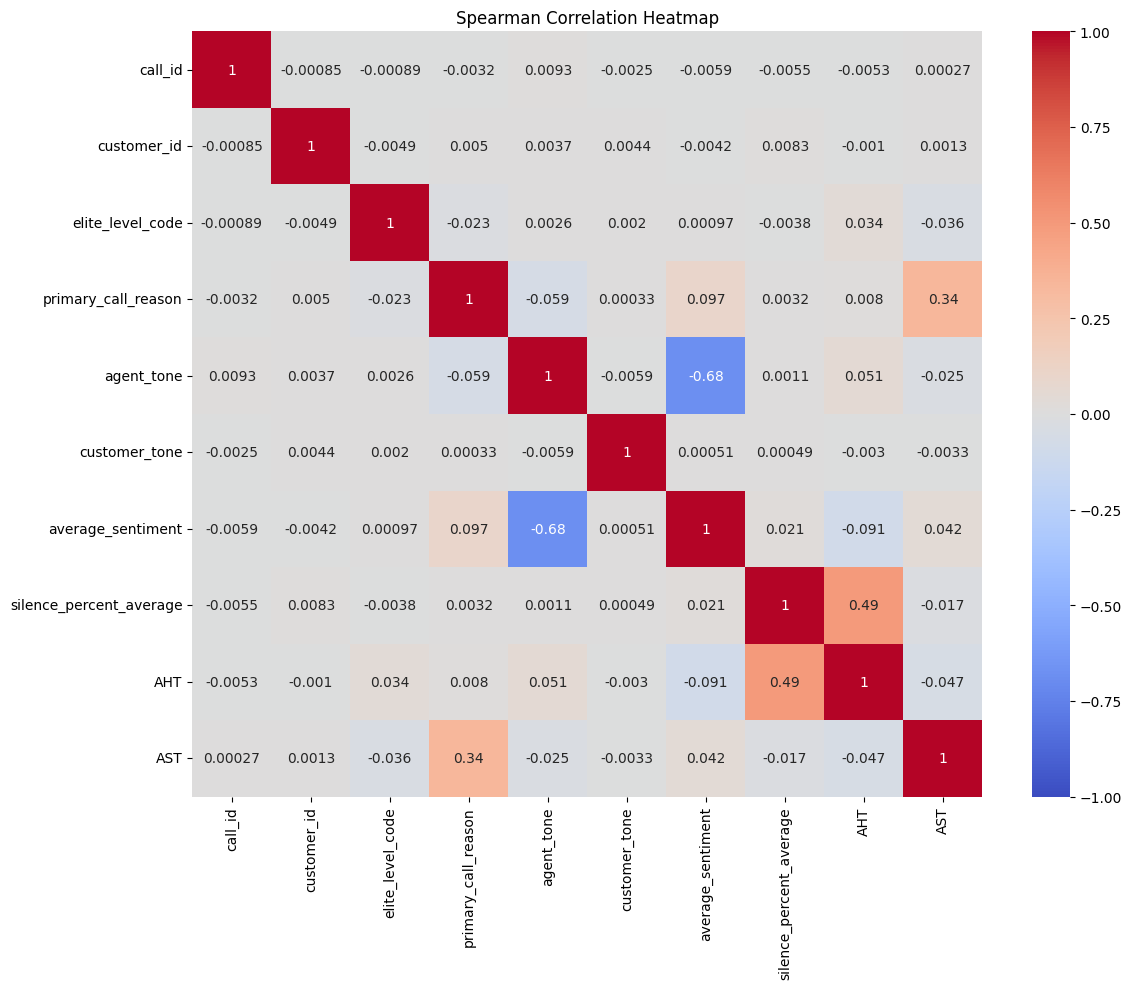

In [35]:
correlation_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = final_df[correlation_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

In [36]:
target_variables = ['AHT', 'AST']
for target in target_variables:
    print(f"\nCorrelations with {target}:")
    correlations = correlation_matrix[target].sort_values(key=abs, ascending=False)
    print(correlations)


Correlations with AHT:
AHT                        1.000000
silence_percent_average    0.494246
average_sentiment         -0.091018
agent_tone                 0.050538
AST                       -0.047327
elite_level_code           0.033530
primary_call_reason        0.008038
call_id                   -0.005300
customer_tone             -0.003010
customer_id               -0.001004
Name: AHT, dtype: float64

Correlations with AST:
AST                        1.000000
primary_call_reason        0.342813
AHT                       -0.047327
average_sentiment          0.042057
elite_level_code          -0.036488
agent_tone                -0.024612
silence_percent_average   -0.016908
customer_tone             -0.003323
customer_id                0.001337
call_id                    0.000266
Name: AST, dtype: float64


2. Kendall correlation

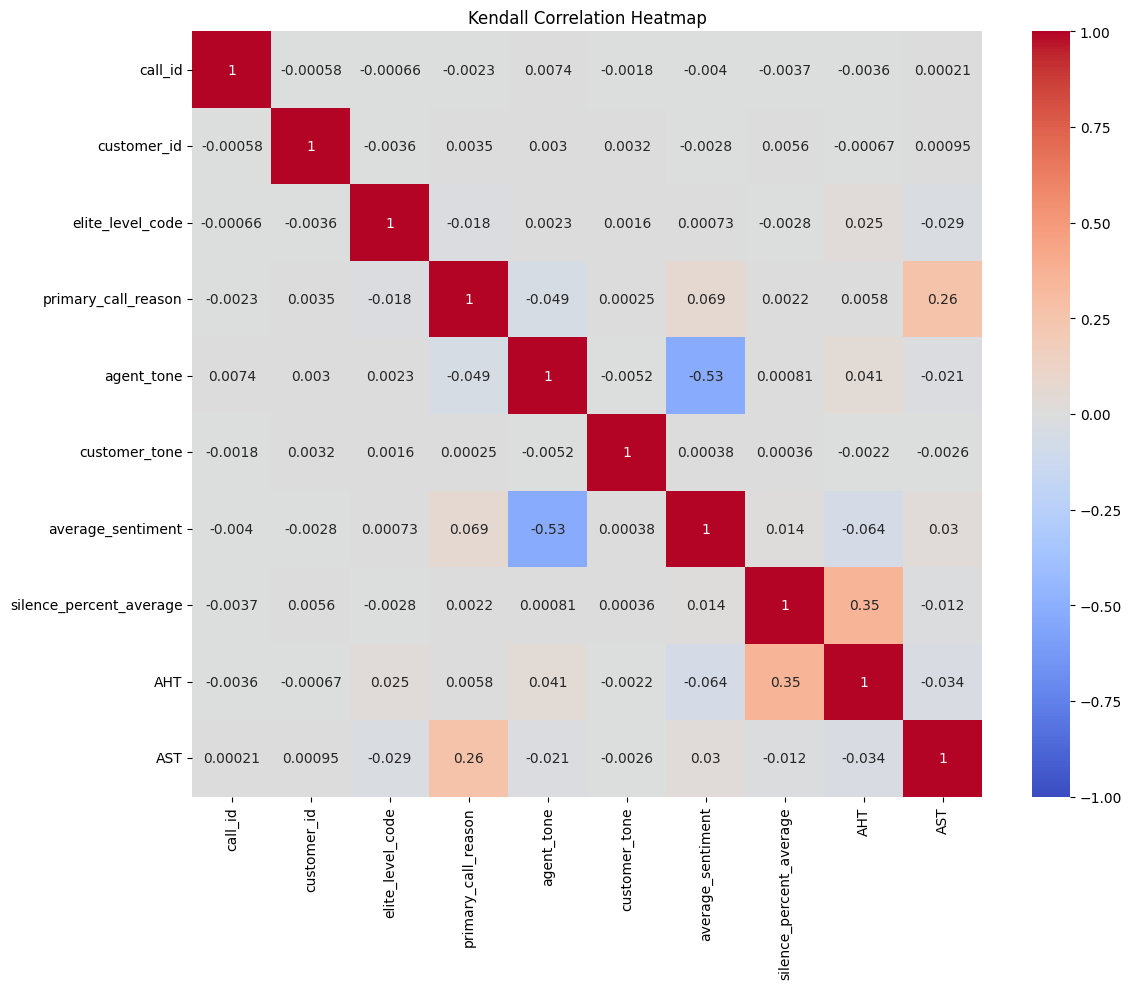

In [37]:
correlation_matrix2 = final_df[correlation_cols].corr(method='kendall')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Kendall Correlation Heatmap')
plt.tight_layout()
plt.show()

3. Finding important features using classifiers


Feature importance for AHT:
silence_percent_average    0.374952
average_sentiment          0.241503
primary_call_reason        0.137411
customer_tone              0.120194
elite_level_code           0.115507
agent_tone                 0.010432
dtype: float64


<ipython-input-38-dc3642763577>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

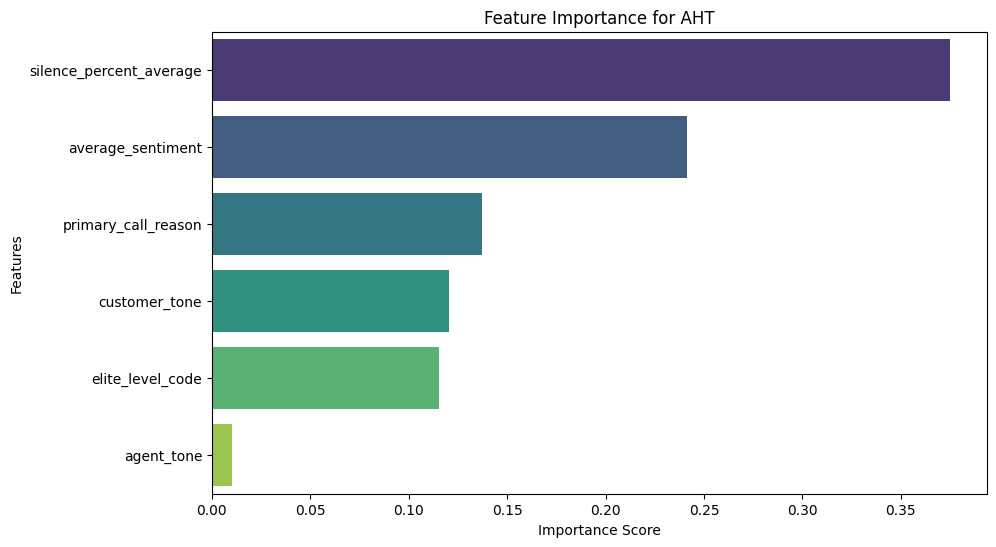


Feature importance for AST:
primary_call_reason        0.754609
silence_percent_average    0.092339
average_sentiment          0.080161
customer_tone              0.035719
elite_level_code           0.033574
agent_tone                 0.003598
dtype: float64


<ipython-input-38-dc3642763577>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

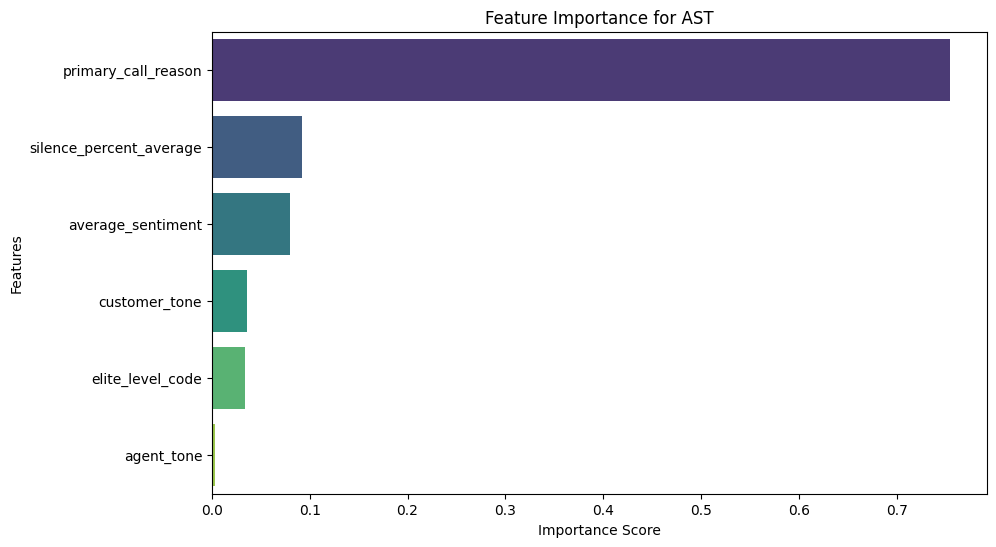

In [38]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

def get_feature_importance(X, y, is_classification=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if is_classification:
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

X = final_df.drop(['AHT', 'AST', 'customer_id', 'call_id'], axis=1)
for target in target_variables:
    is_classification = final_df[target].dtype == 'int64' and final_df[target].nunique() < 5
    importance = get_feature_importance(X, final_df[target], is_classification)

    # Print feature importance
    print(f"\nFeature importance for {target}:")
    print(importance)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance.values, y=importance.index, palette='viridis')
    plt.title(f'Feature Importance for {target}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

# Difference between the average handling time for the most frequent and least frequent call reasons

<ipython-input-39-ea953c3cfa83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

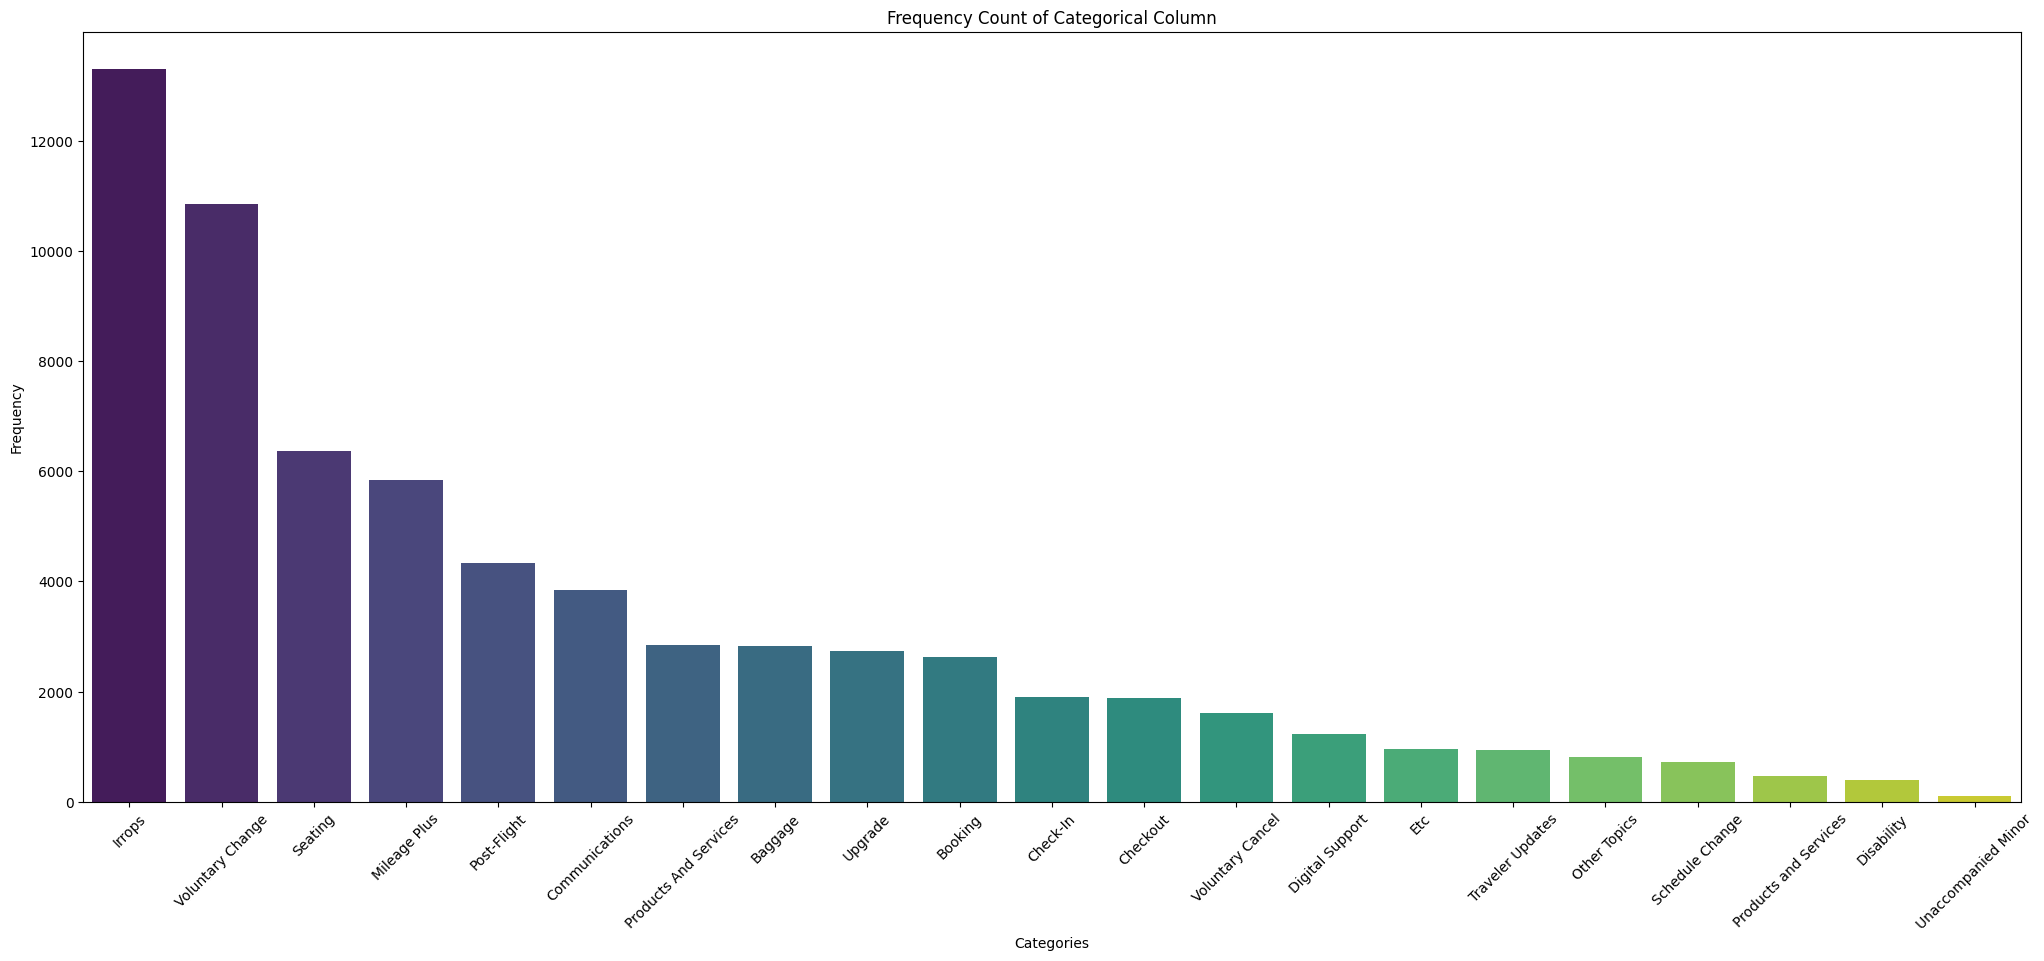

In [39]:
frequency_counts = df3['primary_call_reason'].value_counts()
plt.figure(figsize=(25, 10))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette='viridis')
plt.title('Frequency Count of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [40]:
most_frequent = frequency_counts.idxmax(), frequency_counts.max()
least_frequent = frequency_counts.idxmin(), frequency_counts.min()

print(f"Most Frequent: {most_frequent[0]} with {most_frequent[1]} instances")
print(f"Least Frequent: {least_frequent[0]} with {least_frequent[1]} instances")

mostFreq_sum = merged_df[merged_df['primary_call_reason'] == 'Irrops']['AHT'].mean()
leastFreq_sum = merged_df[merged_df['primary_call_reason'] == 'Unaccompanied Minor']['AHT'].mean()

print(mostFreq_sum/60)
print(leastFreq_sum/60)

Most Frequent: Irrops with 13311 instances
Least Frequent: Unaccompanied Minor with 104 instances
13.085267823604537
8.653846153846155


In [41]:
percentage_difference = ((mostFreq_sum - leastFreq_sum) / leastFreq_sum) * 100
print(percentage_difference)

51.20753929498575
